# Fast Fourier Transform

In [149]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### RasmniGrayga o'tkazish

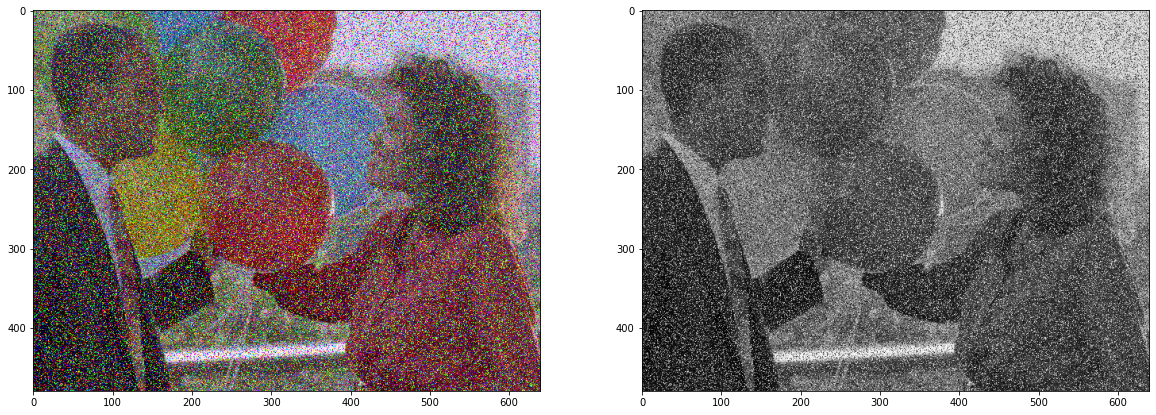

In [102]:
rasm = cv2.imread("balloons.png")
rasm = cv2.cvtColor(rasm, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(rasm, cv2.COLOR_RGB2GRAY)
f, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.imshow(rasm)
ax2.imshow(gray, cmap="gray")
plt.show()

### Rasmdagi shovqinlarni markazga yig'ish

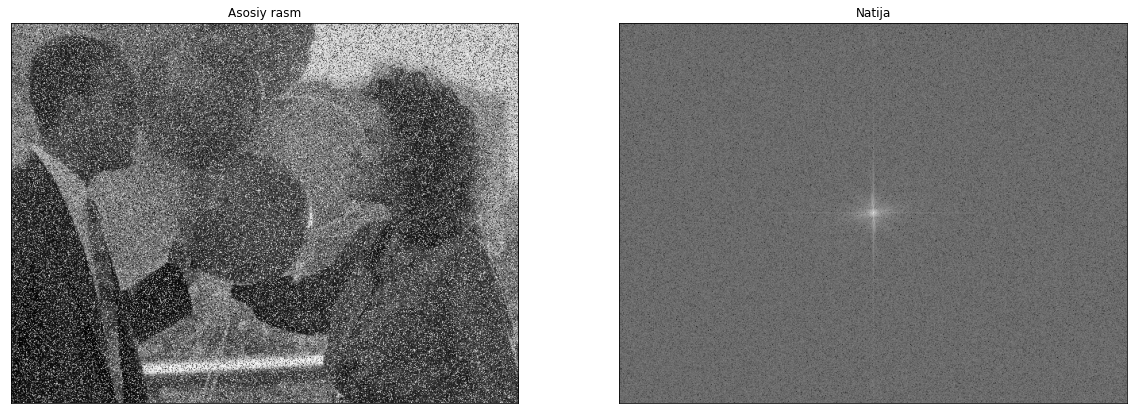

In [115]:
norm_gray = gray/255.0
ff = np.fft.fft2(norm_gray)
fshift = np.fft.fftshift(ff)
hz = 20 * np.log(np.abs(fshift))
f, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
plt.subplot(121),ax1.imshow(norm_gray, cmap = "gray")
plt.title("Asosiy rasm"), plt.xticks([]), plt.yticks([])
plt.subplot(122),ax2.imshow(hz, cmap = "gray")
plt.title("Natija"), plt.xticks([]), plt.yticks([])
plt.show()

In [104]:
norm_gray.shape

(480, 640)

### Past chostatalarni olib tashlab rasmni joyiga qaytarish

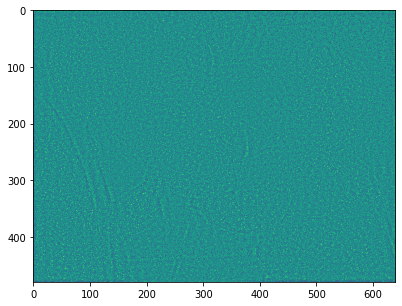

In [119]:
row, col = norm_gray.shape
rows, cols = row//2, col//2
ff = np.fft.fft2(norm_gray)
fshift = np.fft.fftshift(ff)
fshift[rows-30:rows+31, cols-30:cols+31] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)

f, ax1 = plt.subplots(1,1,figsize=(10,5))
ax1.imshow(img_back)
plt.show()

### Yuqori chostatalarni olib tashlash

In [106]:
dft = cv2.dft(np.float32(gray),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

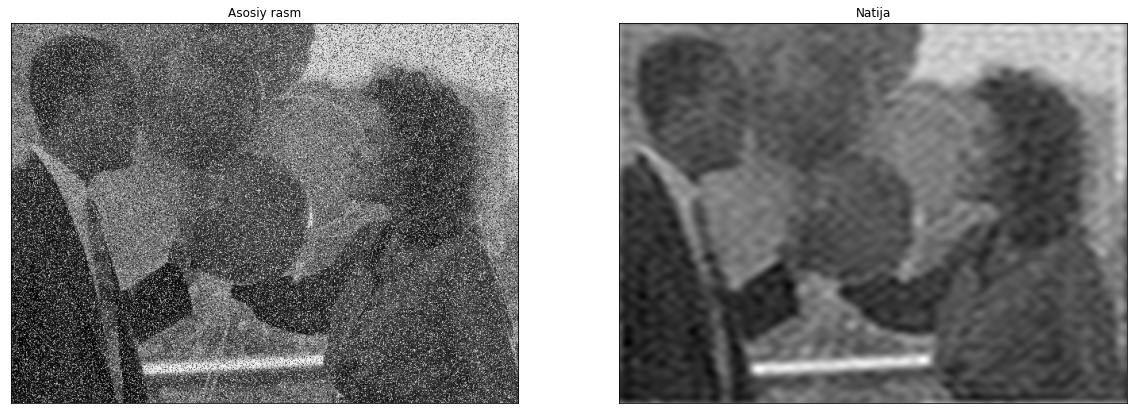

In [107]:
rows, cols = norm_gray.shape
crow,ccol = rows//2, cols//2
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+31, ccol-30:ccol+31] = 1
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
natija = cv2.idft(f_ishift)
natija = cv2.magnitude(natija[:,:,0],natija[:,:,1])
f, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
plt.subplot(121), ax1.imshow(norm_gray, cmap = 'gray')
plt.title("Asosiy rasm"), plt.xticks([]), plt.yticks([])
plt.subplot(122), ax2.imshow(natija, cmap = 'gray')
plt.title("Natija"), plt.xticks([]), plt.yticks([])
plt.show()

# Filter qo'llash

### Asosiy va yuqori chastotalar olib tashlangan rasmlarni edge filterdan o'tkazamiz

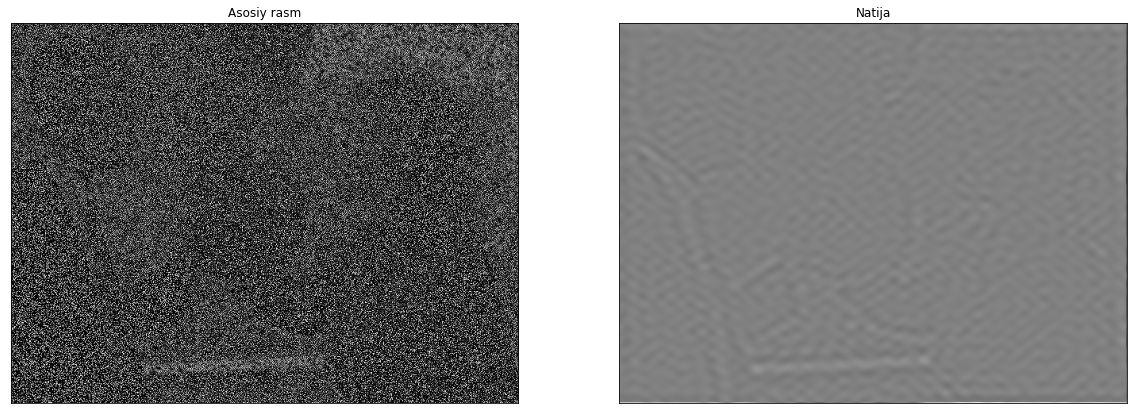

In [109]:
edge = np.array([[0,-1,0],
                [-1,4,-1],
                [0,-1,0]])

filter_gray = cv2.filter2D(gray,-1,edge)
filter_natija = cv2.filter2D(natija,-1,edge)
f, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
plt.subplot(121), ax1.imshow(filter_gray, cmap = 'gray')
plt.title("Asosiy rasm"), plt.xticks([]), plt.yticks([])
plt.subplot(122), ax2.imshow(filter_natija, cmap = 'gray')
plt.title("Natija"), plt.xticks([]), plt.yticks([])
plt.show()

### Asosiy va GaussianBlur rasmlar

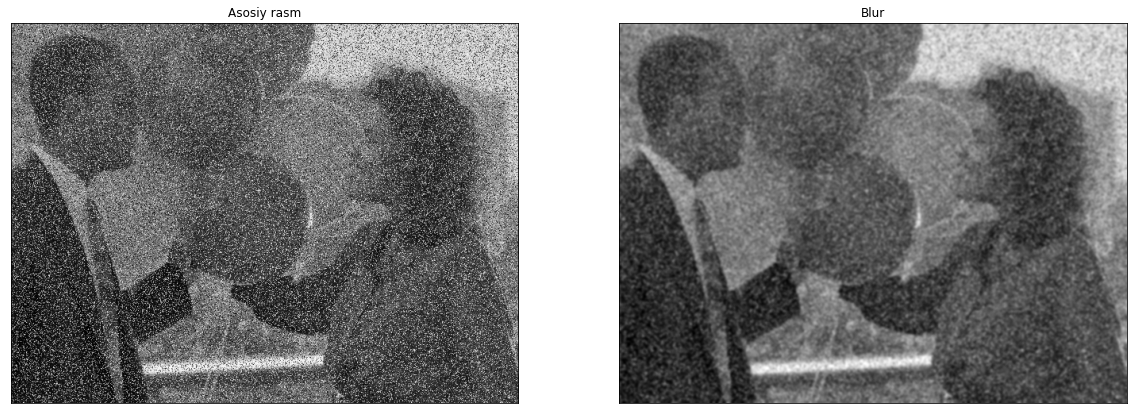

In [112]:
blur = cv2.GaussianBlur(norm_gray,(7,7),0)
f, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
plt.subplot(121), ax1.imshow(norm_gray, cmap = 'gray')
plt.title("Asosiy rasm"), plt.xticks([]), plt.yticks([])
plt.subplot(122), ax2.imshow(blur, cmap = 'gray')
plt.title("Blur"), plt.xticks([]), plt.yticks([])
plt.show()

### Asosiy va Blur rasmlarning shovqinlarini topish

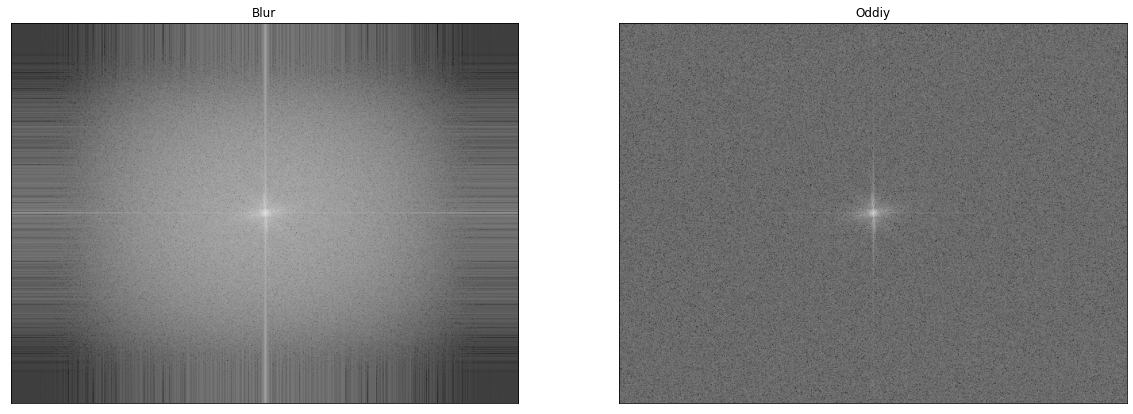

In [111]:
fb = np.fft.fft2(blur)
bshift = np.fft.fftshift(fb)
hzb = 10 * np.log(np.abs(bshift))
f, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
plt.subplot(121),ax1.imshow(hzb, cmap = "gray")
plt.title("Blur"), plt.xticks([]), plt.yticks([])
plt.subplot(122),ax2.imshow(hz, cmap = "gray")
plt.title("Oddiy"), plt.xticks([]), plt.yticks([])
plt.show()

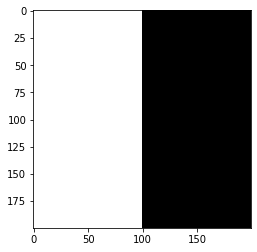

In [153]:
blank_image = np.zeros((200,200,3), np.uint8)
blank_image[:,:200//2] = (255,255,255)
blank_image[:,200//2:200] = (0,0,0)
blank_image = cv2.cvtColor(blank_image, cv2.COLOR_RGB2GRAY)
plt.imshow(blank_image, cmap="gray")
plt.show()

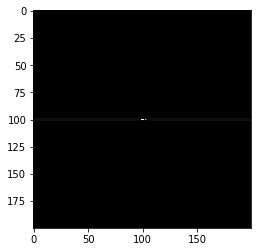

In [158]:
dft = cv2.dft(np.float32(blank_image), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
dft_shift[99:102,:98] = 1
dft_shift[99:102,104:] = 1
ms = 20*np.log(1+cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.imshow(ms, cmap="gray")
plt.show()

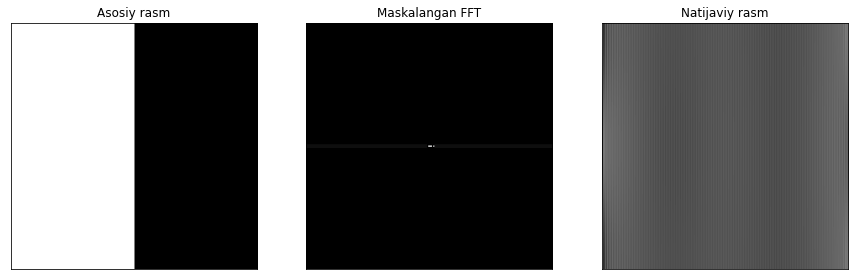

In [163]:
idft_shift = np.fft.ifftshift(ms)
idft = cv2.idft(np.float32(idft_shift), flags = cv2.DFT_COMPLEX_OUTPUT)

f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))
plt.subplot(131),ax1.imshow(blank_image, cmap = "gray")
plt.title("Asosiy rasm"), plt.xticks([]), plt.yticks([])
plt.subplot(132),ax2.imshow(ms, cmap = "gray")
plt.title("Maskalangan FFT"), plt.xticks([]), plt.yticks([])
plt.subplot(133),ax3.imshow(idft, cmap = "gray")
plt.title("Natijaviy rasm"), plt.xticks([]), plt.yticks([])
plt.show()

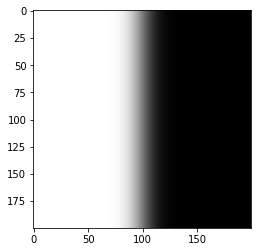

In [165]:
blur = cv2.GaussianBlur(blank_image,(75,75),0)
plt.imshow(blur, cmap="gray")
plt.show()

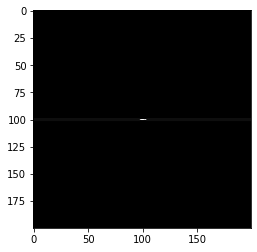

In [166]:
dft = cv2.dft(np.float32(blur), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
dft_shift[99:102,:98] = 1
dft_shift[99:102,104:] = 1
msb = 20*np.log(1+cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.imshow(msb, cmap="gray")
plt.show()

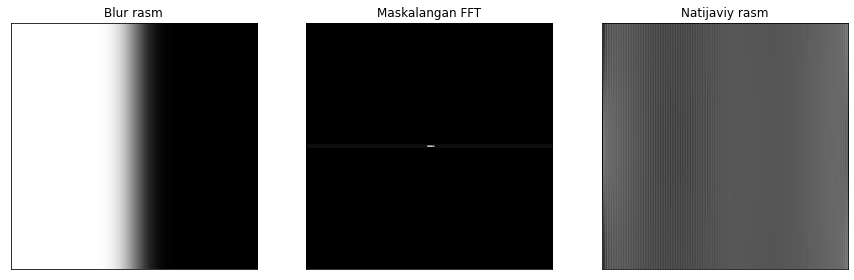

In [168]:
idft_shift = np.fft.ifftshift(msb)
idft = cv2.idft(np.float32(idft_shift), flags = cv2.DFT_COMPLEX_OUTPUT)

f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))
plt.subplot(131),ax1.imshow(blur, cmap = "gray")
plt.title("Blur rasm"), plt.xticks([]), plt.yticks([])
plt.subplot(132),ax2.imshow(msb, cmap = "gray")
plt.title("Maskalangan FFT"), plt.xticks([]), plt.yticks([])
plt.subplot(133),ax3.imshow(idft, cmap = "gray")
plt.title("Natijaviy rasm"), plt.xticks([]), plt.yticks([])
plt.show()

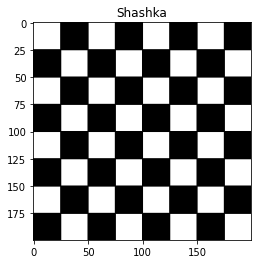

In [169]:
shashka = np.ones((200,200,1), np.uint8)*255
for k in range(0,200,50):
    for i in range(25,200,50):
            shashka = cv2.rectangle(shashka, (i,k), (i+25,k+25), (0,0,0),-1)
for b in range(25,200,50):
    for a in range(0,200,50):
        shashka = cv2.rectangle(shashka, (a,b), (a+25,b+25), (0,0,0),-1)
plt.imshow(cv2.cvtColor(shashka,cv2.COLOR_BGR2RGB))
plt.title('Shashka')
plt.show()

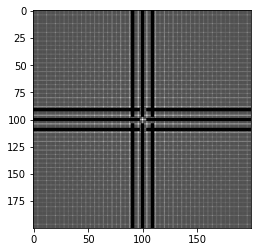

In [173]:
dft = cv2.dft(np.float32(shashka), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
dft_shift[90:93,:98] = 1
dft_shift[99:102,:98] = 1
dft_shift[108:111,:98] = 1
dft_shift[90:93,104:] = 1
dft_shift[99:102,104:] = 1
dft_shift[108:111,104:] = 1

dft_shift[:98,90:93] = 1
dft_shift[:98,99:102] = 1
dft_shift[:98,108:111] = 1
dft_shift[104:,90:93] = 1
dft_shift[104:,99:102] = 1
dft_shift[104:,108:111] = 1
msb = 20*np.log(1+cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.imshow(msb, cmap="gray")
plt.show()

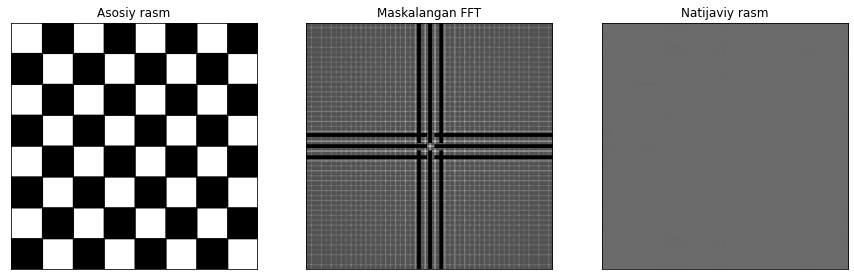

In [174]:
idft_shift = np.fft.ifftshift(msb)
idft = cv2.idft(np.float32(idft_shift), flags = cv2.DFT_COMPLEX_OUTPUT)

f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))
plt.subplot(131),ax1.imshow(shashka, cmap = "gray")
plt.title("Asosiy rasm"), plt.xticks([]), plt.yticks([])
plt.subplot(132),ax2.imshow(msb, cmap = "gray")
plt.title("Maskalangan FFT"), plt.xticks([]), plt.yticks([])
plt.subplot(133),ax3.imshow(idft, cmap = "gray")
plt.title("Natijaviy rasm"), plt.xticks([]), plt.yticks([])
plt.show()

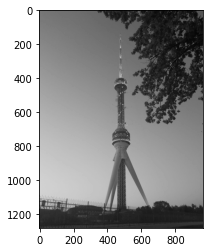

In [175]:
rasm = cv2.imread("teleminora.jpg",0)
plt.imshow(rasm,cmap="gray")
plt.show()

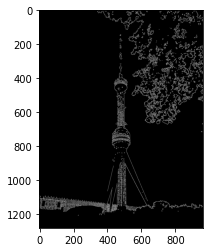

In [177]:
can_rasm = cv2.Canny(rasm,150,200)
plt.imshow(can_rasm,cmap="gray")
plt.show()